<a href="https://colab.research.google.com/github/Tefong35/TefongEugene/blob/main/CASE_STUDY_DKB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

ValueError: mount failed

Teil 1: **Datenvorverarbeitung**

In [ ]:
# Die Bibliotheken, die für die Datenaufbereitung und Auswertung gebraucht werden.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

In [ ]:
Datensatz = pd.read_excel("/content/drive/MyDrive/Case_Study.xlsx", sheet_name='DATA')# delimiter=';')

In [ ]:
Datensatz.head()

,Teamname,Skill,Datum,Anwahlen,Abbrüche,Annahmen,Anzahl Queuezeit mit späterer Annahme,Gesamt Queuezeit mit späterer Annahme,Anzahl Queuezeit mit Abbruch,Gesamt Queuezeit mit Abbruch,Gesamt Gesprächszeit,Gesamte Nachbearbeitungszeit
0,Team_01,Kundenhotline_01,2023-01-02,155,0,155,155,145661.14,0,0.00,67322.72,9475.50
1,Team_01,Kundenhotline_01,2023-01-03,230,0,230,230,128591.31,0,0.00,92856.97,15515.38
2,Team_01,Kundenhotline_01,2023-01-04,225,2,223,223,121474.17,2,1214.94,97288.27,17241.15
3,Team_01,Kundenhotline_01,2023-01-05,214,0,214,214,126605.84,0,0.00,84095.17,15006.04
4,Team_01,Kundenhotline_01,2023-01-06,201,0,201,201,101767.34,0,0.00,79136.96,12631.59


In [ ]:
# Um der erste Überblick über der Datensatz zu verschaffen
Datensatz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Teamname                               146 non-null    object        
 1   Skill                                  146 non-null    object        
 2   Datum                                  146 non-null    datetime64[ns]
 3   Anwahlen                               146 non-null    int64         
 4   Abbrüche                               146 non-null    int64         
 5   Annahmen                               146 non-null    int64         
 6   Anzahl Queuezeit mit späterer Annahme  146 non-null    int64         
 7   Gesamt Queuezeit mit späterer Annahme  146 non-null    float64       
 8   Anzahl Queuezeit mit Abbruch           146 non-null    int64         
 9   Gesamt Queuezeit mit Abbruch           146 non-null    float64   

In [ ]:
# Hier werden Duplikate behandeln
print(Datensatz.duplicated(), end='\n\n')
longueur_initiale = len(Datensatz)
nb_lignes_dupliquees = Datensatz.duplicated().sum()
print("Anzahl doppelter Zeilen:", nb_lignes_dupliquees)
nb_lignes_dupliquees = Datensatz.duplicated().sum()

# die Fonction drop_duplicates dient um Duplikate zu löschen

Datensatz.drop_duplicates(inplace=True)
longueur_finale = len(Datensatz)
print("Anzahl der gelöschten Zeilen:", longueur_initiale-longueur_finale)

0      False
1      False
2      False
3      False
4      False
       ...  
141    False
142    False
143    False
144    False
145    False
Length: 146, dtype: bool

Anzahl doppelter Zeilen: 0
Anzahl der gelöschten Zeilen: 0


**Teil 2: Explorative Datenanalyse**

## Die Kennzahlen, die aus meiner Sicht vorstellbar sind:

In [ ]:
# Gesamt Anzahl der Anwahlen bzw. Abbrüche. Der Kundenbetreuer soll alle Anliegen der Kunden bearbeiten. Denn die lange Wartezeit führt zu
# Abbrüche und die Abbrüche führen zu Unzufriedenheit der Kunden.
print(Datensatz["Anwahlen"].sum(), end='\n\n')
print(Datensatz["Abbrüche"].sum(), end='\n\n')

39837

199



In [ ]:
# Gesamt Anzahl der Anwahlen, Annahmen und Abbrüche pro Teams (zwei Teams)
print(Datensatz.groupby("Teamname")["Anwahlen"].sum(), end='\n\n')
print(Datensatz.groupby("Teamname")["Annahmen"].sum(), end='\n\n')
print(Datensatz.groupby("Teamname")["Abbrüche"].sum(), end='\n\n')


Teamname
Team_01    37164
Team_02     2673
Name: Anwahlen, dtype: int64

Teamname
Team_01    36984
Team_02     2654
Name: Annahmen, dtype: int64

Teamname
Team_01    180
Team_02     19
Name: Abbrüche, dtype: int64



In [ ]:
print(Datensatz.groupby("Teamname")[["Anwahlen", "Annahmen", "Abbrüche"]].sum(), end='\n\n')

          Anwahlen  Annahmen  Abbrüche
Teamname                              
Team_01      37164     36984       180
Team_02       2673      2654        19



In [ ]:
# Anzahl der Anwahlen pro Thema (Skill). # Dabei gibt es acht Themen, zu den der Kunde angerufen hat.
print(Datensatz.groupby("Skill")["Anwahlen"].sum(), end="\n\n")
print(Datensatz.groupby("Skill")["Abbrüche"].sum(), end="\n\n")

Skill
Helpline_intern        521
Kundenhotline_01      2011
Kundenhotline_02      8120
Kundenhotline_03      4748
Kundenhotline_04     23111
Kundenhotline_05       919
Notfallhotline_01      397
Notfallhotline_02       10
Name: Anwahlen, dtype: int64

Skill
Helpline_intern        3
Kundenhotline_01      12
Kundenhotline_02      31
Kundenhotline_03      23
Kundenhotline_04     120
Kundenhotline_05       4
Notfallhotline_01      6
Notfallhotline_02      0
Name: Abbrüche, dtype: int64



In [ ]:
# Die Anzahl der Anwahlen pro Thema, wenn das Team bekannt ist.
Datensatz.groupby(["Teamname", "Skill"])["Anwahlen"].sum()


Teamname  Skill            
Team_01   Kundenhotline_01      1980
          Kundenhotline_02      7881
          Kundenhotline_03      4677
          Kundenhotline_04     22626
Team_02   Helpline_intern        521
          Kundenhotline_01        31
          Kundenhotline_02       239
          Kundenhotline_03        71
          Kundenhotline_04       485
          Kundenhotline_05       919
          Notfallhotline_01      397
          Notfallhotline_02       10
Name: Anwahlen, dtype: int64

In [ ]:
Datensatz.columns

Index(['Teamname', 'Skill', 'Datum', 'Anwahlen', 'Abbrüche', 'Annahmen',
       'Anzahl Queuezeit mit späterer Annahme',
       'Gesamt Queuezeit mit späterer Annahme', 'Anzahl Queuezeit mit Abbruch',
       'Gesamt Queuezeit mit Abbruch', 'Gesamt Gesprächszeit',
       'Gesamte Nachbearbeitungszeit'],
      dtype='object')

In [ ]:
# Hier wurde bereits die Gesamt Queuezeit zusammengefasst, somit kann man deskriptiv nicht sehr gut beurteilen...
# Gesamt Queuezeit mit späterer Annahme
print(Datensatz['Gesamt Queuezeit mit späterer Annahme'].describe(), end="\n\n")
print("Durchschnittliche Queeuzeit mit späterer Annahme =", Datensatz['Gesamt Queuezeit mit späterer Annahme'].sum()/Datensatz['Anzahl Queuezeit mit späterer Annahme'].sum())

count    1.460000e+02
mean     1.449648e+05
std      3.226658e+05
min      9.690000e+00
25%      2.147212e+03
50%      1.229443e+04
75%      1.143390e+05
max      2.259385e+06
Name: Gesamt Queuezeit mit späterer Annahme, dtype: float64

Durchschnittliche Queeuzeit mit späterer Annahme = 533.9538569049901


In [ ]:
# Gesamt Queuezeit mit Abbruch
print(Datensatz['Gesamt Queuezeit mit Abbruch'].describe(), end="\n\n")
print("Durchschnittliche Queeuzeit mit Abbruch =", Datensatz['Gesamt Queuezeit mit Abbruch'].sum()/Datensatz['Anzahl Queuezeit mit Abbruch'].sum())

count     146.000000
mean      557.303014
std      1360.005024
min         0.000000
25%         0.000000
50%         0.000000
75%       412.572500
max      8909.310000
Name: Gesamt Queuezeit mit Abbruch, dtype: float64

Durchschnittliche Queeuzeit mit Abbruch = 408.87557788944724


In [ ]:
# Gesamt Gesprächszeit
print(Datensatz['Gesamt Gesprächszeit'].describe(), end="\n\n")
print("Durchschnittliche Gesprächszeit =", Datensatz['Gesamt Gesprächszeit'].sum()/Datensatz['Annahmen'].sum())

count       146.000000
mean     106106.190479
std      211788.025128
min         253.810000
25%        3887.442500
50%       14922.160000
75%       83885.920000
max      921182.460000
Name: Gesamt Gesprächszeit, dtype: float64

Durchschnittliche Gesprächszeit = 390.82455749533284


Es gibt weitere Kennzahlen wie die durchschnittliche Nachbearbeitungszeit. Diese dient zu gucken, ob der Kundenbetreuer sehr belastet ist, um eine Lösung zu finden. Jedoch habe ich mich nur für die o.g. Kennzahlen beschränkt.

## Die Informationen, die die Quelldaten zu Darstellungszwecken angereichert werden könnten, sind:

In [ ]:
#

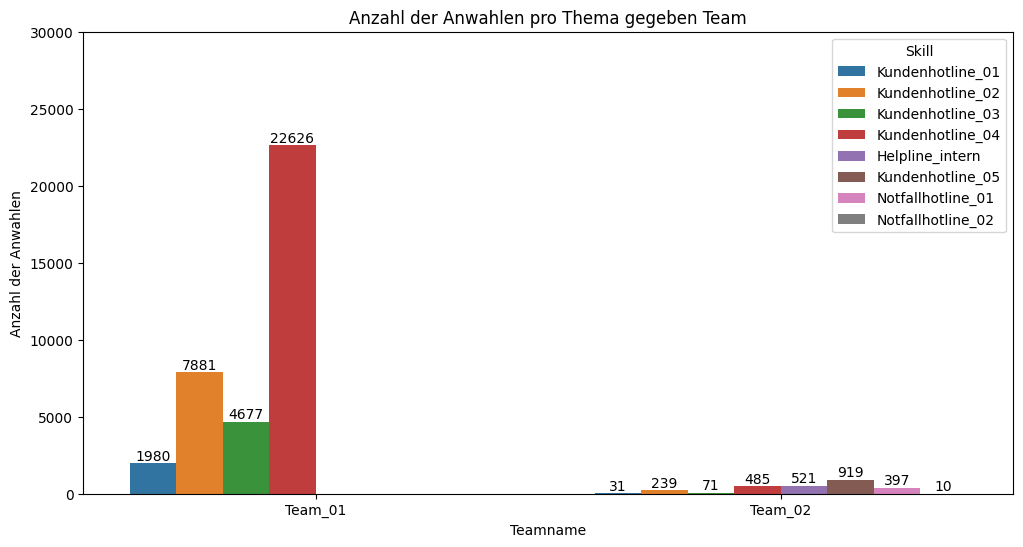

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
Graf=Datensatz.groupby(["Teamname", "Skill"])["Anwahlen"].sum()
ax=sns.barplot(x=Graf.index.get_level_values(0), y=Graf.values, hue=Graf.index.get_level_values(1))
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0, 30000)
plt.title("Anzahl der Anwahlen pro Thema gegeben Team")
plt.xlabel("Teamname")
plt.ylabel("Anzahl der Anwahlen")
plt.show()


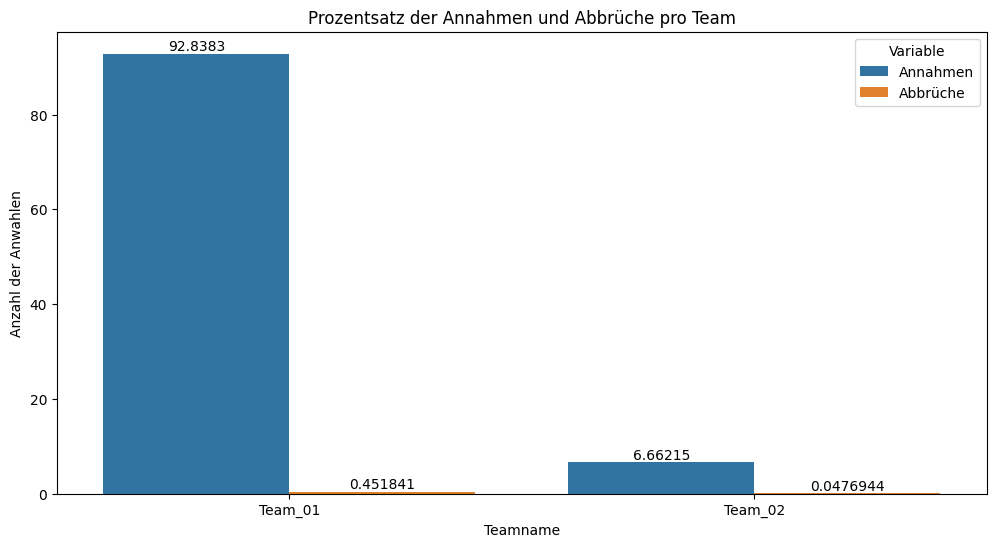

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
Graf=Datensatz.groupby("Teamname")[["Annahmen", "Abbrüche"]].sum()*100/Datensatz["Anwahlen"].sum()

# Reset the index to make 'Teamname' a column again
Graf = Graf.reset_index()

# Melt the DataFrame to have 'Anwahlen' and 'Abbrüche' in one column for plotting
Graf = Graf.melt(id_vars=['Teamname'], var_name='Variable', value_name='Value')

ax=sns.barplot(x='Teamname', y='Value', hue='Variable', data=Graf)
for i in ax.containers:
    ax.bar_label(i,)
#plt.ylim(0, 30000)
plt.title("Prozentsatz der Annahmen und Abbrüche pro Team")
plt.xlabel("Teamname")
plt.ylabel("Anzahl der Anwahlen")
plt.show()

In [ ]:
Graf=Datensatz.groupby("Teamname")[["Annahmen"]].sum()*100/Datensatz[["Anwahlen"]="Team_01"].sum()
Graf

,Annahmen
Teamname,
Team_01,92.838316
Team_02,6.662148


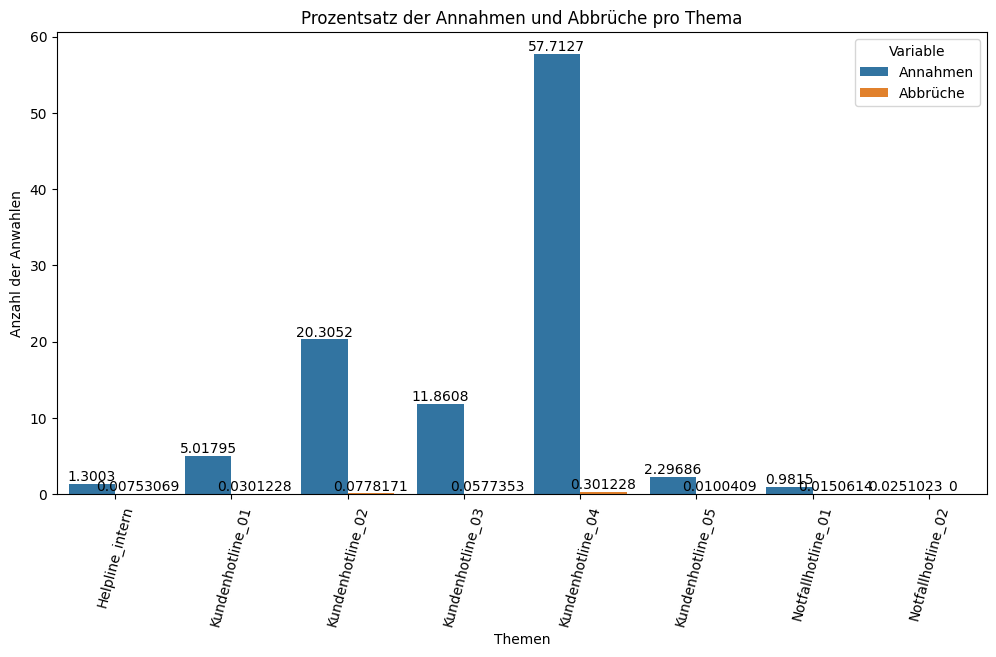

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
Graf=Datensatz.groupby("Skill")[["Annahmen", "Abbrüche"]].sum()*100/Datensatz["Anwahlen"].sum()

# Reset the index to make 'Teamname' a column again
Graf = Graf.reset_index()

# Melt the DataFrame to have 'Anwahlen' and 'Abbrüche' in one column for plotting
Graf = Graf.melt(id_vars=['Skill'], var_name='Variable', value_name='Value')

ax=sns.barplot(x='Skill', y='Value', hue='Variable', data=Graf)
for i in ax.containers:
    ax.bar_label(i,)
#plt.ylim(0, 30000)
plt.title("Prozentsatz der Annahmen und Abbrüche pro Thema")
plt.xlabel("Themen")
plt.ylabel("Anzahl der Anwahlen")
plt.xticks(rotation=75)
plt.show()

<ipython-input-103-4f8d952013ed>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(xticklabels, rotation=75)
<ipython-input-103-4f8d952013ed>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(xticklabels, rotation=75)


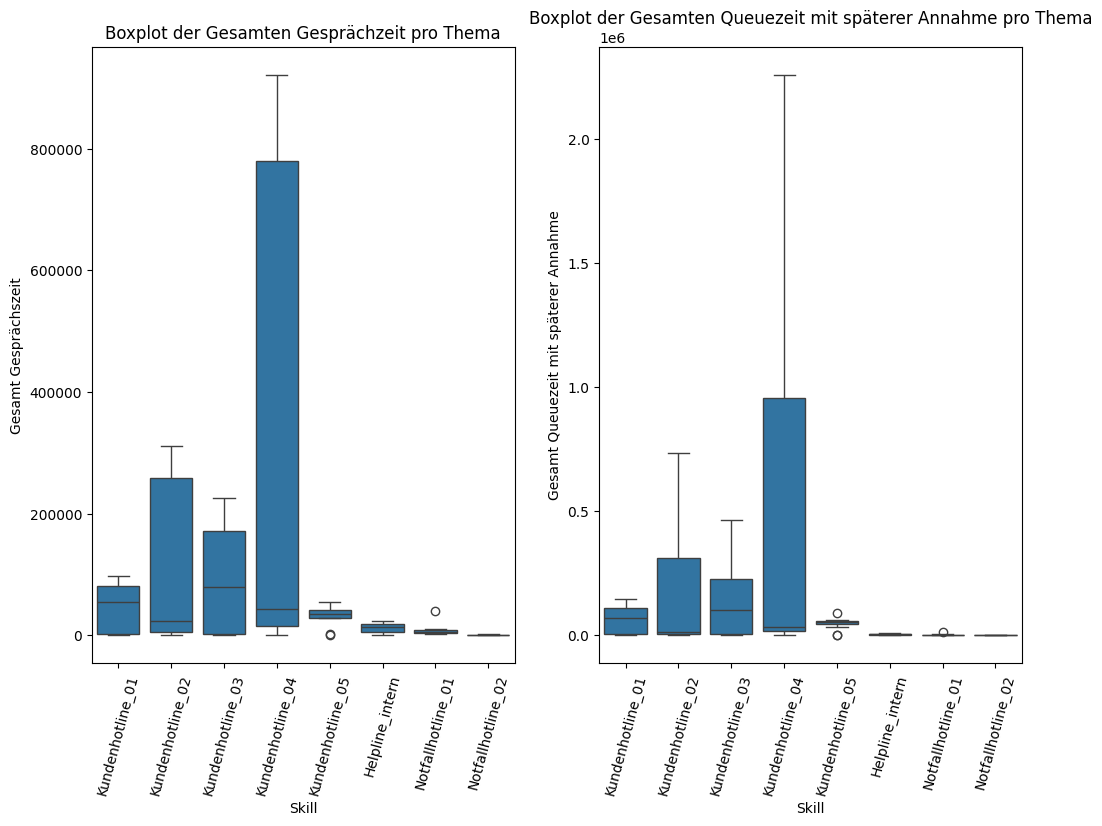

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
#fig.suptitle('Pokemon Stats by Generation')

sns.boxplot(ax=axes[0], x="Skill", y="Gesamt Gesprächszeit", data=Datensatz)
axes[0].set_title("Boxplot der Gesamten Gesprächzeit pro Thema")
xticklabels = axes[0].get_xticklabels()
axes[0].set_xticklabels(xticklabels, rotation=75)
sns.boxplot(ax=axes[1], x="Skill", y="Gesamt Queuezeit mit späterer Annahme", data=Datensatz)
axes[1].set_title("Boxplot der Gesamten Queuezeit mit späterer Annahme pro Thema")
xticklabels = axes[1].get_xticklabels()
axes[1].set_xticklabels(xticklabels, rotation=75)
plt.show()

In [ ]:
# Zeitraum
print(Datensatz["Datum"].min(), Datensatz["Datum"].max())

2023-01-01 00:00:00 2023-01-15 00:00:00


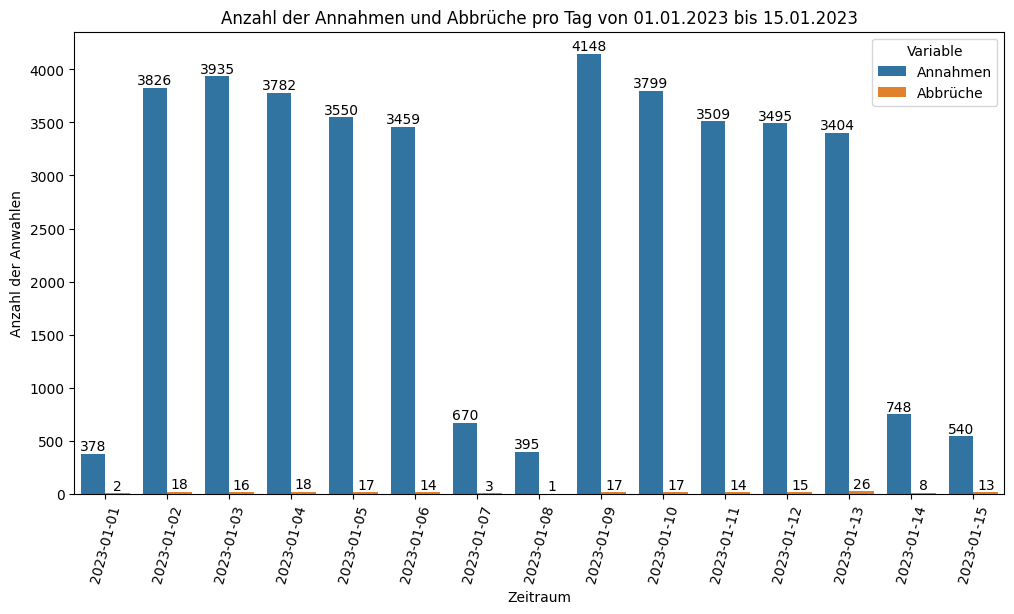

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
Graf=Datensatz.groupby(["Datum"])[["Annahmen", "Abbrüche"]].sum()
# Reset the index to make 'Teamname' a column again
Graf = Graf.reset_index()
# Melt the DataFrame to have 'Anwahlen' and 'Abbrüche' in one column for plotting
Graf = Graf.melt(id_vars=['Datum'], var_name='Variable', value_name='Value')

ax=sns.barplot(x='Datum', y='Value', hue='Variable', data=Graf)

#ax=sns.barplot(x=Graf.index, y=Graf.values) # Removed hue, as there's only one level in the index
for i in ax.containers:
    ax.bar_label(i,)
#plt.ylim(0, 30000)
plt.xlabel("Zeitraum")
plt.ylabel("Anzahl der Anwahlen")
plt.title("Anzahl der Annahmen und Abbrüche pro Tag von 01.01.2023 bis 15.01.2023")
plt.xticks(rotation=75)
plt.show()

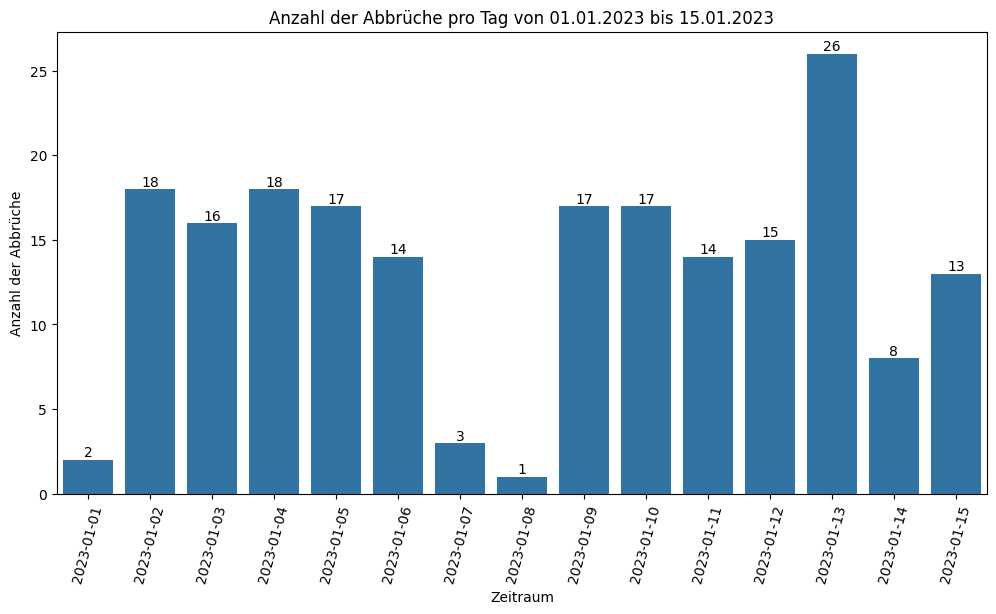

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
Graf=Datensatz.groupby(["Datum"])["Abbrüche"].sum()
ax=sns.barplot(x=Graf.index, y=Graf.values) # Removed hue, as there's only one level in the index
for i in ax.containers:
    ax.bar_label(i,)
#plt.ylim(0, 30000)
plt.xlabel("Zeitraum")
plt.ylabel("Anzahl der Abbrüche")
plt.title("Anzahl der Abbrüche pro Tag von 01.01.2023 bis 15.01.2023")
plt.xticks(rotation=75)
plt.show()

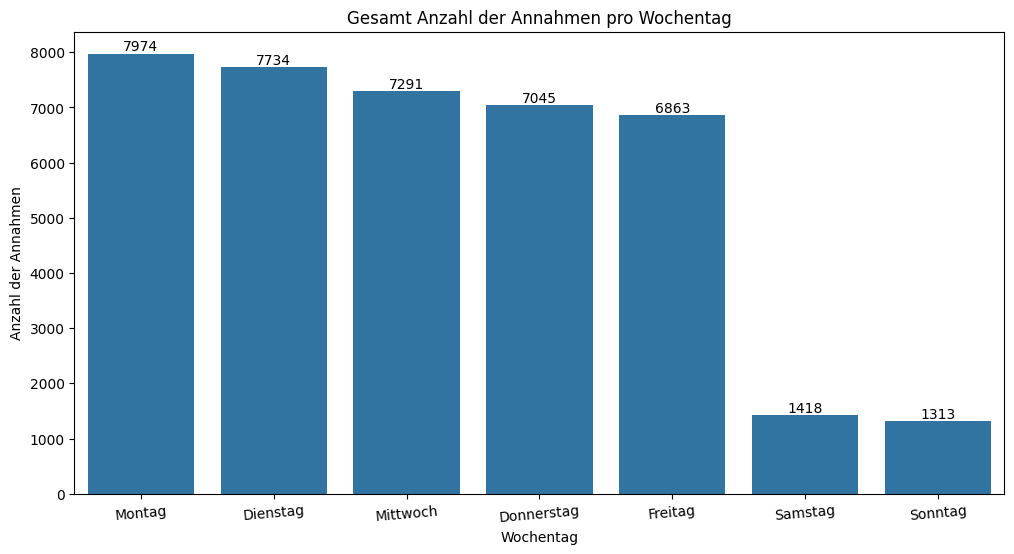

In [ ]:
# Wann wird viel los unter der Woche?
# Hier wird die Anzahl der Annahmen pro Wochentag dargestellt, damit kann sich der Kundenbetreuer vorbeiten.
# Samstag und Sonntag wurden berücksichtigt. Ich gehe, davon aus, dass die Datensatz nicht plausibel ist??
Datensatz["Wochentag"] = Datensatz["Datum"].dt.weekday
fig, ax = plt.subplots(figsize=(12,6))
Graf=Datensatz.groupby(["Wochentag"])["Annahmen"].sum()
ax=sns.barplot(x=Graf.index, y=Graf.values) # Removed hue, as there's only one level in the index
for i in ax.containers:
    ax.bar_label(i,)
#plt.ylim(0, 30000)
plt.xlabel("Wochentag")
plt.ylabel("Anzahl der Annahmen")
plt.xticks(np.arange(7), ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"], rotation=5)
plt.title("Gesamt Anzahl der Annahmen pro Wochentag")
plt.show()


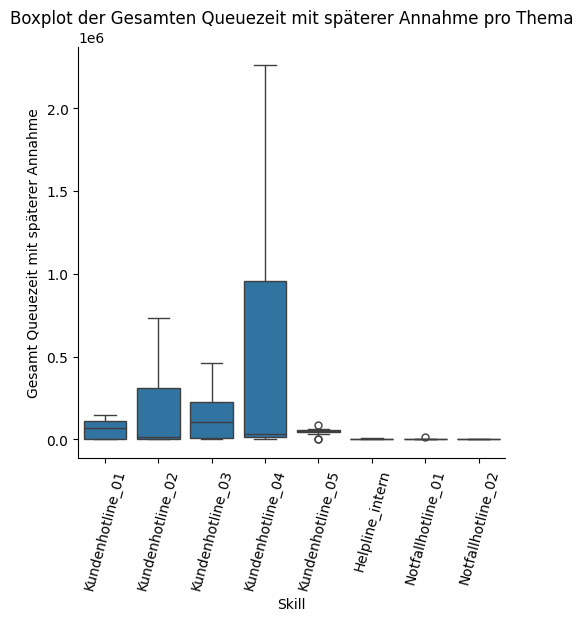

In [ ]:
sns.catplot(x="Skill", y="Gesamt Queuezeit mit späterer Annahme", data=Datensatz, kind="box")
plt.title("Boxplot der Gesamten Queuezeit mit späterer Annahme pro Thema")
plt.xticks(rotation=75)
plt.show()

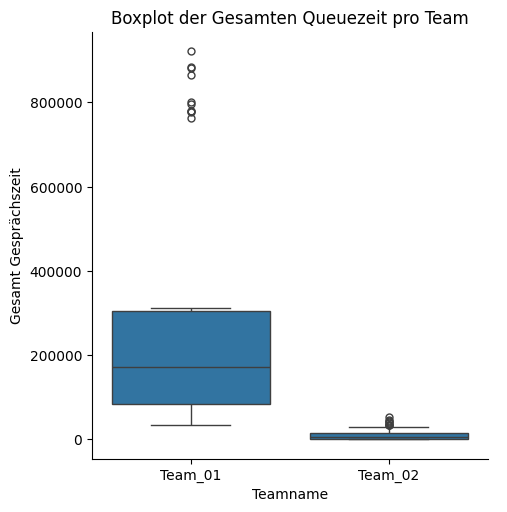

In [ ]:
sns.catplot(x="Teamname", y="Gesamt Gesprächszeit", data=Datensatz, kind="box")
plt.title("Boxplot der Gesamten Gesprächzeit pro Team")
#plt.xticks(rotation=75)
plt.show()

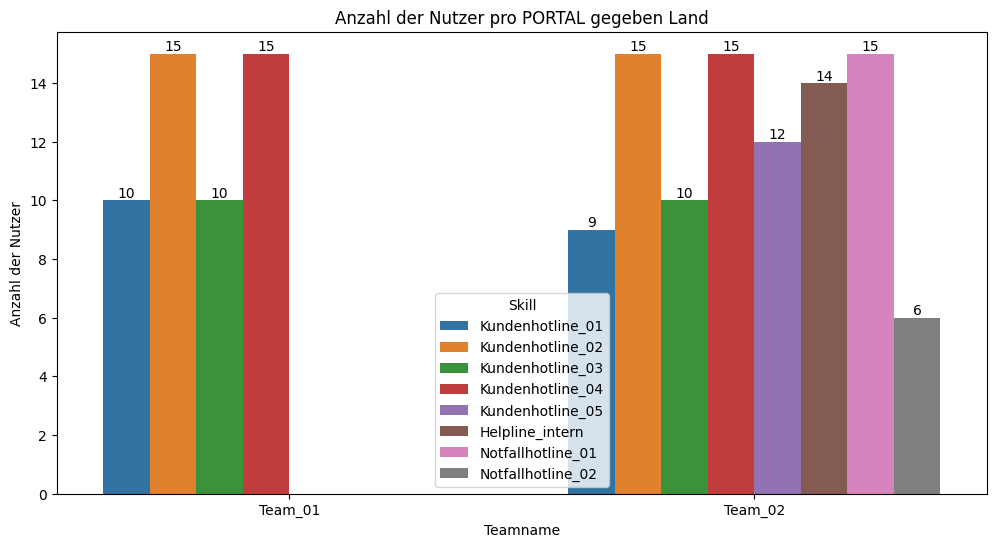

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
# Get the desired order from groupby and convert to a list
order = Datensatz.groupby(["Teamname", "Skill"])["Anwahlen"].sum().index.get_level_values(0).unique().tolist()
# Pass 'order' to the countplot
sns.countplot(x="Teamname", hue="Skill", data=Datensatz, order=order)
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Anzahl der Nutzer')
plt.title("Anzahl der Nutzer pro PORTAL gegeben Land")
plt.show()

In [ ]:
!apt-get install pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 30 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]


In [ ]:
! pandoc --version

pandoc 2.9.2.1
Compiled with pandoc-types 1.20, texmath 0.12.0.2, skylighting 0.8.5
Default user data directory: /root/.local/share/pandoc or /root/.pandoc
Copyright (C) 2006-2020 John MacFarlane
Web:  https://pandoc.org
This is free software; see the source for copying conditions.
There is no warranty, not even for merchantability or fitness
for a particular purpose.


In [ ]:

!jupyter nbconvert --to pdf /content/CASE_STUDY_DKB.ipynb --no-input

[NbConvertApp] Converting notebook /content/CASE_STUDY_DKB.ipynb to pdf
[NbConvertApp] Support files will be in CASE_STUDY_DKB_files/
[NbConvertApp] Making directory ./CASE_STUDY_DKB_files
[NbConvertApp] Writing 39312 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 396852 bytes to /content/CASE_STUDY_DKB.pdf


In [ ]:
%ls

drive/  sample_data/


In [ ]:

# Get the current working directory using os.getcwd()
import os

print("File location using os.getcwd():", os.getcwd())


File location using os.getcwd(): /content


In [ ]:
#Get a Directory of the Current Python Script using sys.argv[0]
import os
import sys
script_directory = os.path.dirname(os.path.abspath(sys.argv[0]))
print(script_directory)


/usr/local/lib/python3.11/dist-packages


In [ ]:
from google.colab import files
files.upload()

Saving Case_Study.xlsx to Case_Study.xlsx


{'Case_Study.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00J\xf5%\xd1\x84\x01\x00\x00\x91\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
# Download
files.download('Case_Study.xlsx')
# /content/Case_Study.xlsx

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# List directory
import os
os.listdir()

['.config', 'Case_Study.xlsx', 'drive', 'sample_data']

In [ ]:
# Install Necessary LaTeX Packages
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-lo

In [ ]:
# Step 3: Download the PDF
from google.colab import files
files.download("/content/CASE_STUDY_DKB.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>